# Forecasting population growth with state-space models

1. As an auto-regressive process (AR1 or AR2).
2. With an extended Kalman Filter (Ricker equation).

In [49]:
import models
import numpy as np
import matplotlib.pyplot as plt

/var/folders/s8/rp7pfvm507qcvckzx566r47c0000gp/T/ipykernel_34822/3608297809.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

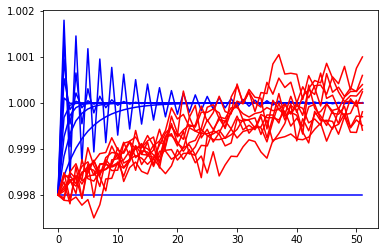

In [57]:
def simulate(r):

    init_s = 0.998

    r1= 0.05
    r2= 0.05

    mf_pars = {'lambda': r, 'K': 1}
    mf_errs = {"sigma":0.000,"phi":0.0, "init_u":0.0}

    mo_pars = {'lambda1': r1, 'K1': 1, 'alpha':1, 'beta':0.00006, 'lambda2': r2+0.0001, 'K2': 1, 'gamma':1, 'delta':0.00005}
    mo_errs = {"sigma":0.0001,"phi":0.0002, "init_u":0.0}

    sf_pars = {"iterations":1*52, "initial_size": init_s, "ensemble_size": 1}
    so_pars = {"iterations":1*52, "initial_size": (init_s, init_s), "ensemble_size": 1}

    mf = models.Ricker_Single(set_seed=False)
    mo = models.Ricker_Multi(set_seed=False)

    mf.parameters(mf_pars, mf_errs)
    mo.parameters(mo_pars, mo_errs)

    yf = mf.simulate(sf_pars)['ts']
    yo = mo.simulate(so_pars)['ts']

    return yf, yo

fs = []
os = []
r = np.linspace(0.0, 1.9, 10)
for i in range(len(r)):
    yf, yo = simulate(r[i])
    fs.append(yf)
    os.append(yo[:,:,0])

fig = plt.figure()
ax = plt.subplots()
plt.plot(np.array(fs).squeeze().transpose(), color="blue")
plt.plot(np.array(os).squeeze().transpose(), color="red")
fig.show()